In [6]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from PIL import Image
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import math as mt
import myFilters

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def getDifferenceFromImages(img1, img2, doWork = False):
  if doWork:
    temp = img1.astype(np.int32) - img2.astype(np.int32)
    temp = np.where(temp < 0, 0, temp)
  else:
    temp = abs(img1.astype(np.int32) - img2.astype(np.int32))
  return temp.astype(np.uint8)

L0 - количество измененных пикселей\
L1 - абсолютная разница между двумя изображениями\
L2 - евклидово расстояние между двумя изображениями\
Linf - максимальное изменение интенсивности цвета

In [3]:
def Metrics(origImg, advImg):
  diffBtwArrays = origImg.astype(np.int32) - advImg.astype(np.int32)
  L0 = np.sum(np.where(diffBtwArrays != 0, 1, diffBtwArrays))
  L1 = np.sum(abs(diffBtwArrays))
  L2 = np.sum(diffBtwArrays**2) ** 0.5
  Linf = np.max(abs(diffBtwArrays))

  return L0, L1, L2, Linf

# Загрузка изображения

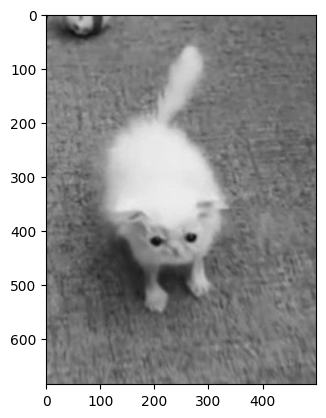

In [7]:
image = np.asarray(Image.open("/content/kaajWuWtVGU.jpg").convert("L"))
imgplot = plt.imshow(image, cmap="gray", vmax = 255, vmin = 0)

M, N = image.shape
P, Q = 2 * M, 2 * N

# Применение фильтр окружности

In [8]:
maxRadius = (M**2 + N**2) ** 0.5
radius = int(maxRadius * 0.15)
result, G, F = myFilters.frequencyFourierFilter(image, myFilters.circleFilter, fRadius = radius)

<Figure size 640x480 with 0 Axes>

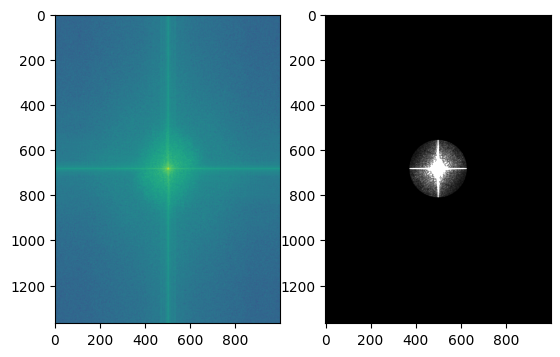

In [9]:
plt.figure()
fig, axis = plt.subplots(1, 2)

axis[0].imshow(np.reshape(np.array([mt.log10(x) for x in np.reshape(abs(F), (1,-1))[0]]), (P,Q)))
axis[1].imshow(abs(G), cmap="gray", vmax = 255, vmin = 0)

L0 = 285308
L1 = 868806
L2 = 2496.58
Linf = 65


<Figure size 640x480 with 0 Axes>

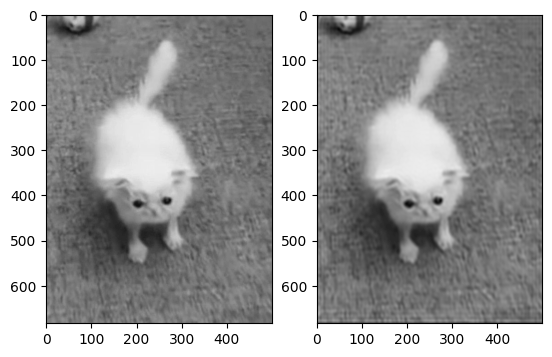

In [11]:
L0, L1, L2, Linf = Metrics(image, result)
print("L0 = %d\nL1 = %d\nL2 = %.2f\nLinf = %d" % (L0, L1, L2, Linf))
plt.figure()
fig, axis = plt.subplots(1, 2)

axis[0].imshow(image, cmap="gray", vmax = 255, vmin = 0)
axis[1].imshow(result, cmap="gray", vmax = 255, vmin = 0)

# Окружность большего радиуса

In [12]:
radius = int(maxRadius * 0.75)
result, G, F = myFilters.frequencyFourierFilter(image, myFilters.circleFilter, fRadius = radius)

<Figure size 640x480 with 0 Axes>

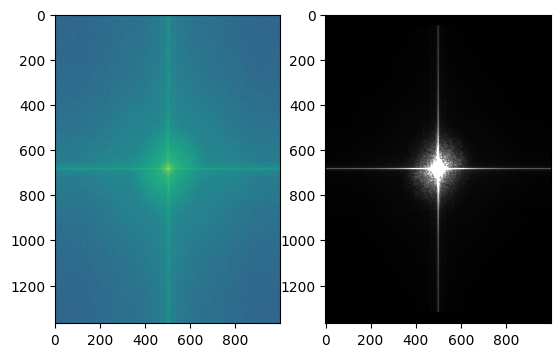

In [13]:
plt.figure()
fig, axis = plt.subplots(1, 2)

axis[0].imshow(np.reshape(np.array([mt.log10(x) for x in np.reshape(abs(F), (1,-1))[0]]), (P,Q)))
axis[1].imshow(abs(G), cmap="gray", vmax = 255, vmin = 0)

L0 = 178695
L1 = 230867
L2 = 892.13
Linf = 56


<Figure size 640x480 with 0 Axes>

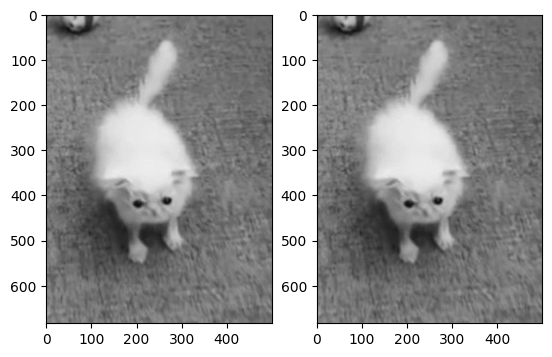

In [14]:
L0, L1, L2, Linf = Metrics(image, result)
print("L0 = %d\nL1 = %d\nL2 = %.2f\nLinf = %d" % (L0, L1, L2, Linf))
plt.figure()
fig, axis = plt.subplots(1, 2)

axis[0].imshow(image, cmap="gray", vmax = 255, vmin = 0)
axis[1].imshow(result, cmap="gray", vmax = 255, vmin = 0)

# Применение прямоугольного фильтра

In [18]:
result, G, F = myFilters.frequencyFourierFilter(image, myFilters.rectangleFilter, fWidth = 100, fHeight = 200)

<Figure size 640x480 with 0 Axes>

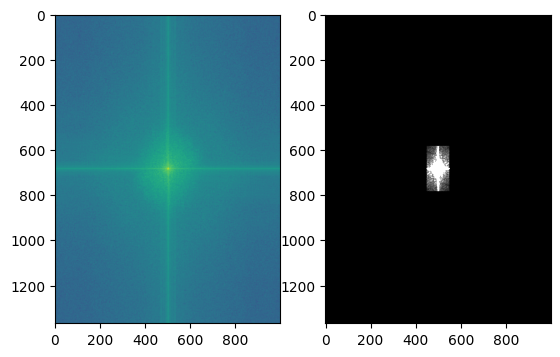

In [19]:
plt.figure()
fig, axis = plt.subplots(1, 2)

axis[0].imshow(np.reshape(np.array([mt.log10(x) for x in np.reshape(abs(F), (1,-1))[0]]), (P,Q)))
axis[1].imshow(abs(G), cmap="gray", vmax = 255, vmin = 0)

L0 = 310556
L1 = 1659597
L2 = 4539.19
Linf = 237


<Figure size 640x480 with 0 Axes>

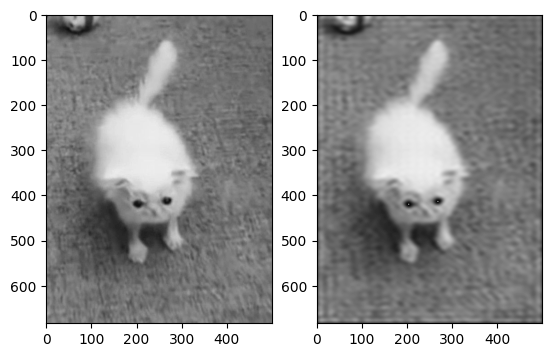

In [20]:
L0, L1, L2, Linf = Metrics(image, result)
print("L0 = %d\nL1 = %d\nL2 = %.2f\nLinf = %d" % (L0, L1, L2, Linf))
plt.figure()
fig, axis = plt.subplots(1, 2)

axis[0].imshow(image, cmap="gray", vmax = 255, vmin = 0)
axis[1].imshow(result, cmap="gray", vmax = 255, vmin = 0)

# Цветное изображение

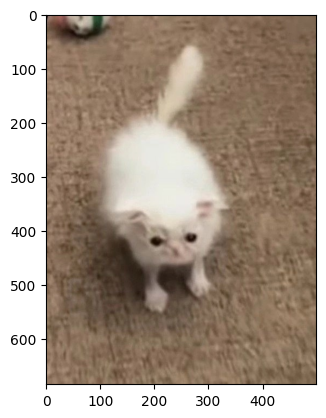

In [21]:
image = np.asarray(Image.open("/content/kaajWuWtVGU.jpg"))
imgplot = plt.imshow(image)

M, N, _ = image.shape
P, Q = 2 * M, 2 * N

In [61]:
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

In [62]:
radius = int(maxRadius * 0.25)
resRed, redG, redF = myFilters.frequencyFourierFilter(red, myFilters.circleFilter, fRadius = radius)
resBlue, blueG, blueF = myFilters.frequencyFourierFilter(blue, myFilters.circleFilter, fRadius = radius)
resGreen, greenG, greenF = myFilters.frequencyFourierFilter(green, myFilters.circleFilter, fRadius = radius)

(-0.5, 999.5, 1367.5, -0.5)

<Figure size 640x480 with 0 Axes>

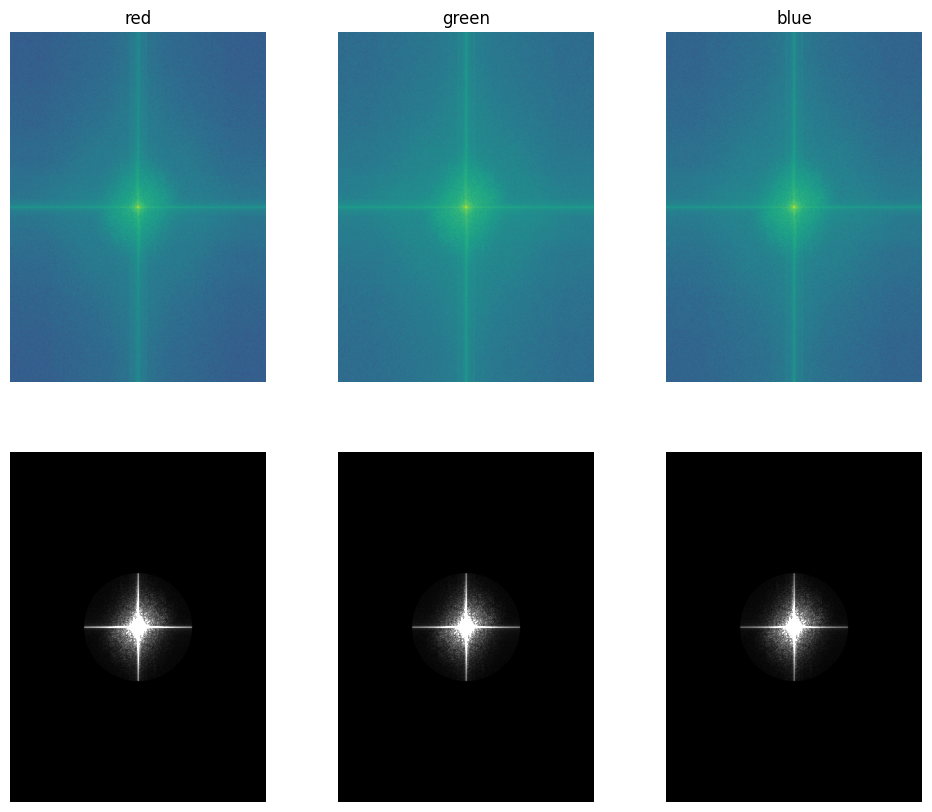

In [63]:
plt.figure()
fig, axis = plt.subplots(2, 3, figsize=(12, 10))

axis[0][0].imshow(np.reshape(np.array([mt.log10(x) for x in np.reshape(abs(redF), (1,-1))[0]]), (P,Q)))
axis[0][0].set_title('red')
axis[0][0].axis('off')
axis[0][1].imshow(np.reshape(np.array([mt.log10(x) for x in np.reshape(abs(greenF), (1,-1))[0]]), (P,Q)))
axis[0][1].set_title('green')
axis[0][1].axis('off')
axis[0][2].imshow(np.reshape(np.array([mt.log10(x) for x in np.reshape(abs(blueF), (1,-1))[0]]), (P,Q)))
axis[0][2].set_title('blue')
axis[0][2].axis('off')

axis[1][0].imshow(abs(redG), cmap="gray", vmax = 255, vmin = 0)
axis[1][0].axis('off')
axis[1][1].imshow(abs(greenG), cmap="gray", vmax = 255, vmin = 0)
axis[1][1].axis('off')
axis[1][2].imshow(abs(blueG), cmap="gray", vmax = 255, vmin = 0)
axis[1][2].axis('off')

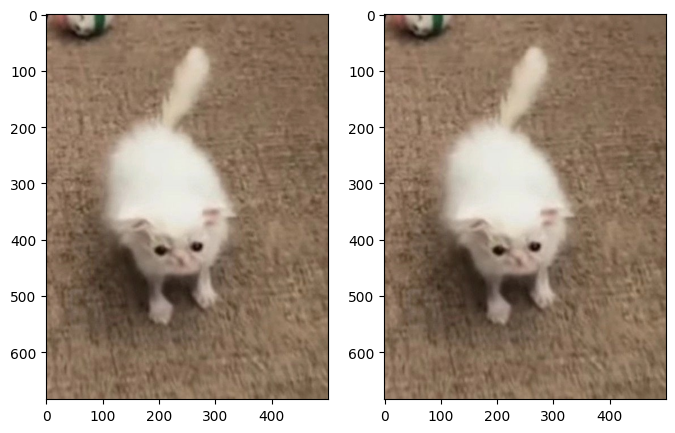

In [64]:
fig, axis = plt.subplots(1, 2, figsize=(8, 5))
result = np.zeros(image.shape)
result[:, :, 0] = red
result[:, :, 1] = green
result[:, :, 2] = blue

axis[0].imshow(image)
axis[1].imshow(result.astype(np.uint8))